## <i> <span style='color:red'>MULTIPLE LINEAR REGRESSION:TOYOTA COROLLA DATA</i></span>


### Problem Statment: predict the Price of  car based on the different features in the dataset

### Importing the necessery libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm
from ml_metrics import rmse
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
toyota = pd.read_csv('ToyotaCorolla.csv', encoding= 'unicode_escape')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


### Checking all the columns in the  dataset

In [3]:
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [4]:
toyota1 = toyota[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [5]:
toyota1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
toyota2 = toyota1.rename({'Age_08_04':'Age','Quarterly_Tax':'QTax'},axis=1)

In [7]:
toyota2.head()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Looking into the basic summary of the dataset

In [8]:
toyota2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QTax    1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:
toyota2[toyota2.duplicated(keep= False)]

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
112,24950,8,13253,116,2000,5,5,234,1320
113,24950,8,13253,116,2000,5,5,234,1320


In [10]:
toyota3 = toyota2.drop_duplicates()

In [11]:
toyota3.shape

(1435, 9)

In [12]:
toyota3.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


### Based on the above correlation matrix, it is clear the  different features presented in the dataset do not have much collinearity.Checking the relationship between the variables using scatterplot for better clarity

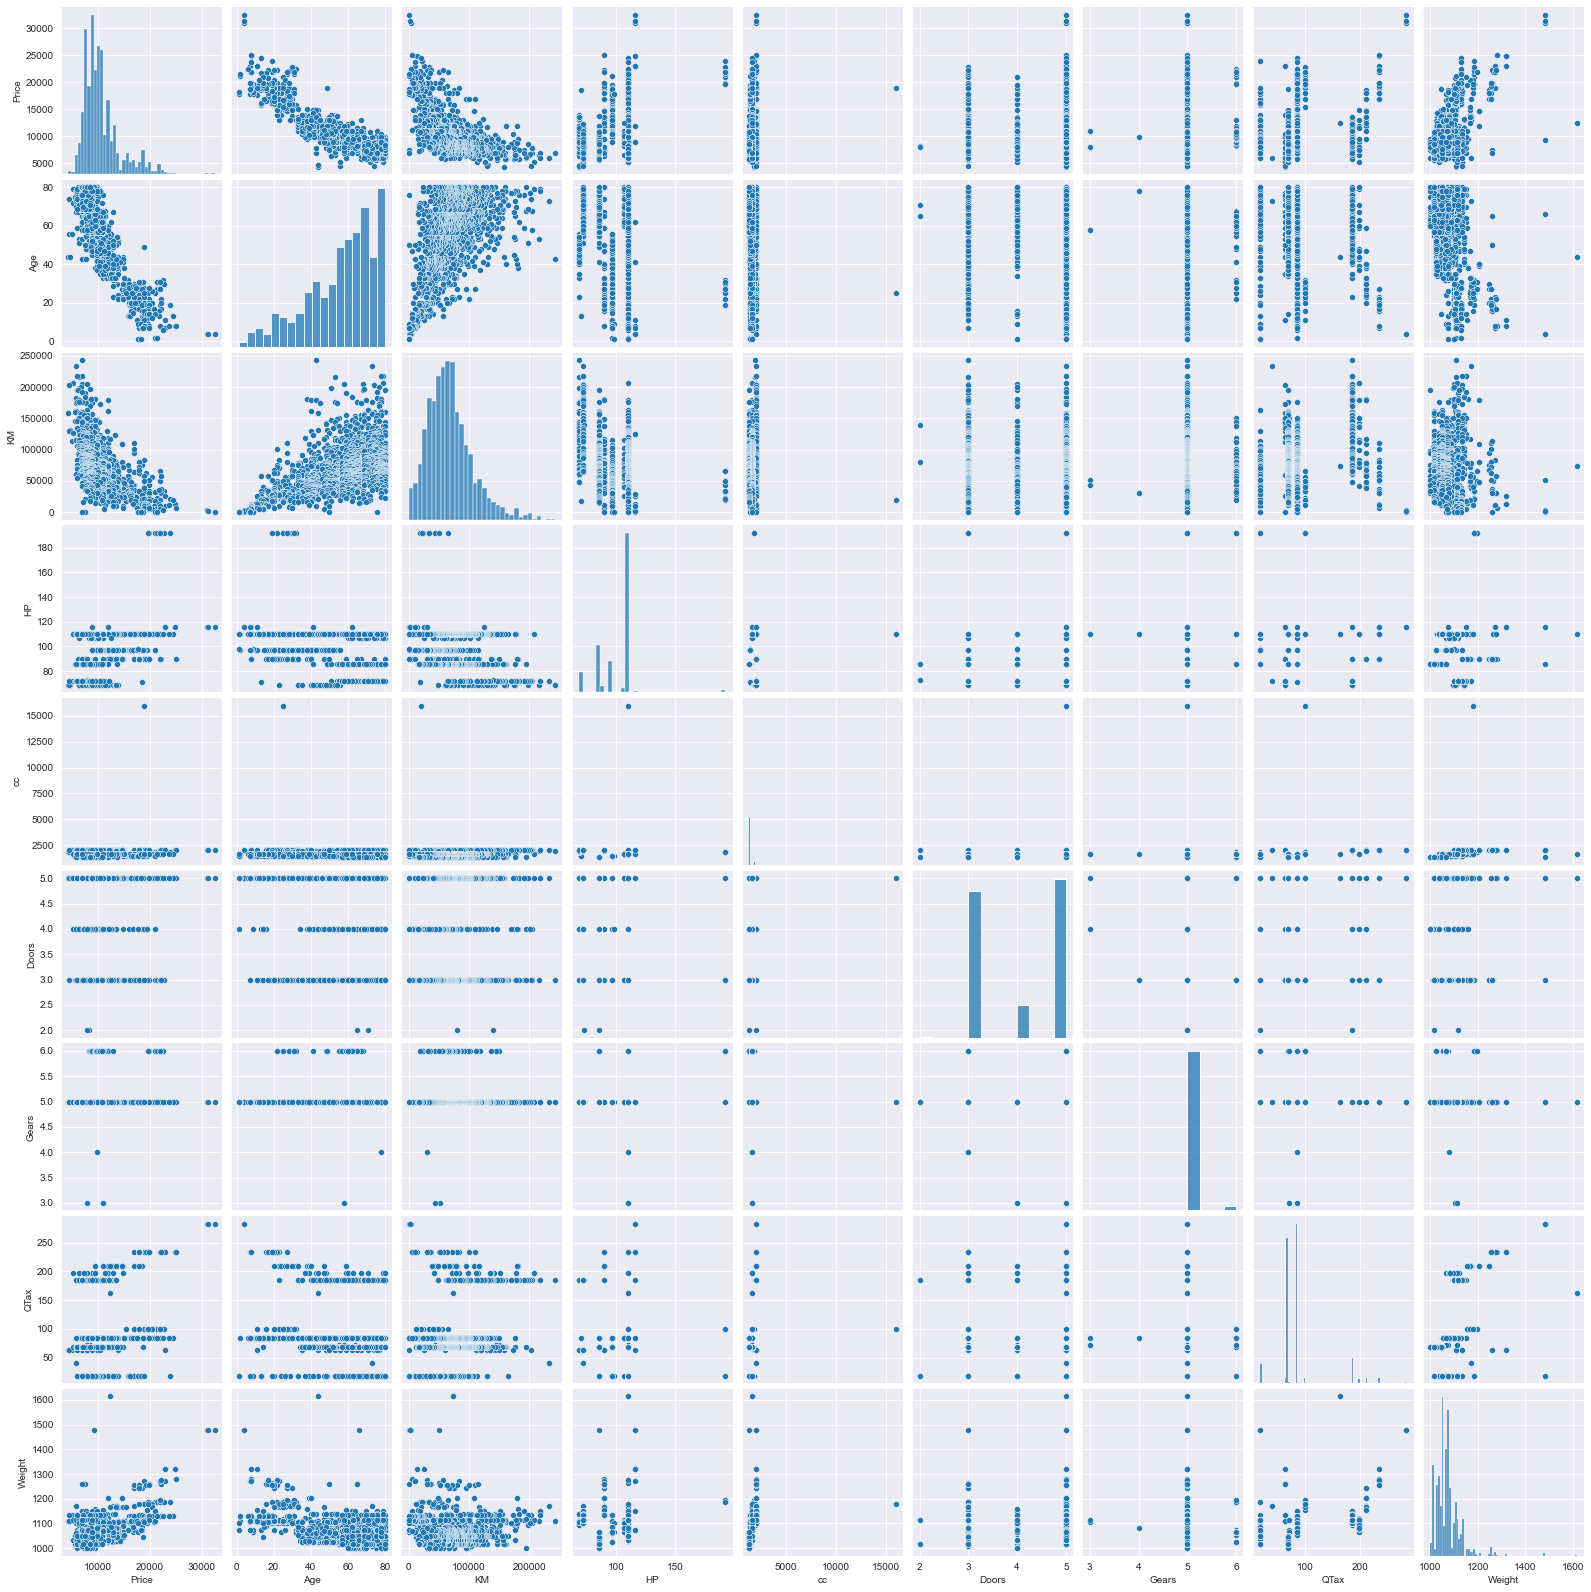

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota3)



### Model1-Creating a model for better prediction of the car price without using any transformation

In [14]:
model1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight', data = toyota3).fit()

In [15]:
#Coefficentsts
model1.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QTax            3.858805
Weight         16.855470
dtype: float64

In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:21:25   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QTax           3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
pred1 = model1.predict(toyota3.iloc[:,1:])
r1=rmse(pred1,toyota3.Price)
r1

1337.5902507310752

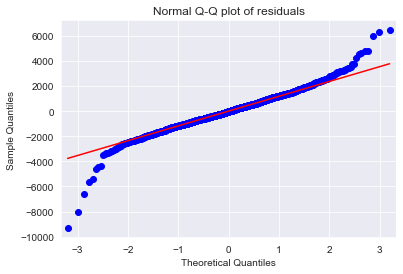

In [18]:
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
list(np.where(model1.resid<-4000))

[array([190, 191, 220, 392, 401, 600, 653, 959], dtype=int64)]

In [20]:
list(np.where(model1.resid>4000))

[array([ 109,  110,  111,  124,  146,  170,  522, 1057], dtype=int64)]

## Residual plot for homoscedasticity

In [21]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

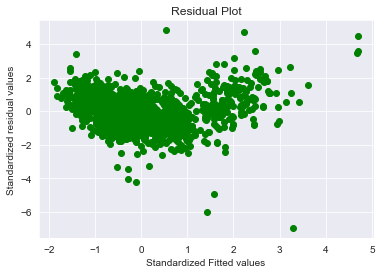

In [22]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid),color='green')

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [23]:
toyota4= toyota3.drop(toyota3.index[[109,110,111,124,146,170,190,191,220,392,401,522,600,653,959,1057]],axis=0).reset_index()

In [24]:
toyota4= toyota4.drop(['index'],axis=1)

In [25]:
toyota4.shape

(1419, 9)

### Model2-New model with the dataset(toyota4) where changed the extreme datas

In [26]:
model2 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight', data = toyota4).fit()

In [27]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1325.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:21:26   Log-Likelihood:                -12042.
No. Observations:                1419   AIC:                         2.410e+04
Df Residuals:                    1410   BIC:                         2.415e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.281e+04   1458.915     -8.779      0.000   -1.57e+04   -9946.344
Age         -114.9859      2.417    -47.568      0.000    -119.728    -110.244
KM            -0.0200      0.001    -17.773      0.000      -0.022      -0.018
HP            20.8295      2.586      8.054      0.000      15.756      25.903
cc            -0.1586      0.080     -1.981      0.048      -0.316      -0.002
Doors        -73.5254     36.164     -2.033      0.042    -144.467      -2.584
Gears        649.4229    172.976      3.754      0.000     310.105     988.741
QTax          -4.2058      1.298     -3.240      0.001      -6.752      -1.659
Weight        25.0748      1.268     19.773      0.000      22.587      27.562
==============================================================================
Omnibus:                        5.850   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                6.526
Skew:                           0.082   Prob(JB):                       0.0383
Kurtosis:                       3.289   Cond. No.                     3.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
pred2 = model2.predict(toyota4.iloc[:,1:])
r2=rmse(pred2,toyota4.Price)
r2

1173.4030469746838


### Cook’s Distance- to check the influencers /outliers

In [29]:
model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance

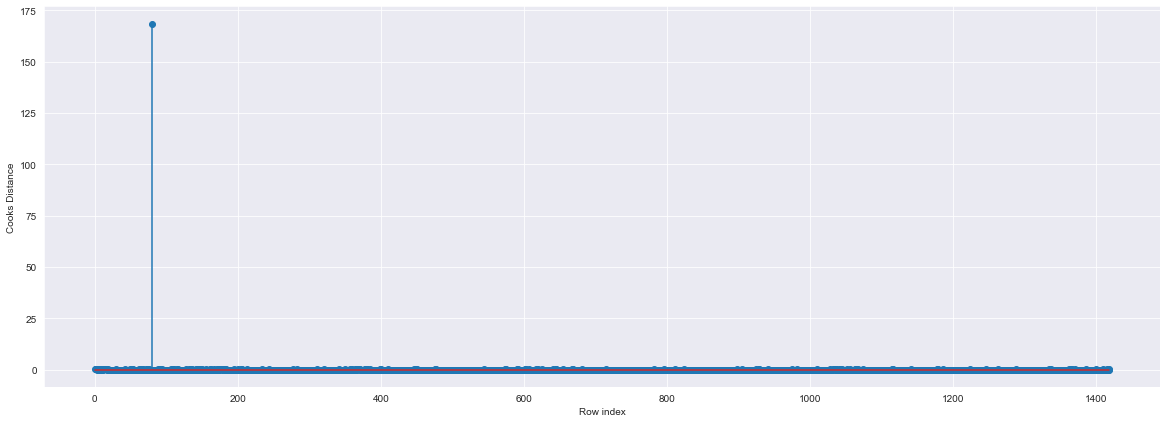

In [30]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [31]:
#index and value of outliers
(np.argmax(c),np.max(c))

(80, 168.48548782679106)

In [32]:
k = toyota4.shape[1]
n = toyota4.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.021141649048625793


### Removing the data at index 80 from the dataset

In [33]:
toyota5= toyota4.drop(toyota4.index[[80]],axis=0).reset_index()

In [34]:
toyota5= toyota5.drop(['index'],axis=1)


### Model3-Improve model using new data by droping the outlier toyota5

In [35]:
model3 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight', data = toyota5).fit()

In [36]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1445.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:21:27   Log-Likelihood:                -11977.
No. Observations:                1418   AIC:                         2.397e+04
Df Residuals:                    1409   BIC:                         2.402e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.622e+04   1435.062    -11.300      0.000    -1.9e+04   -1.34e+04
Age         -110.6898      2.354    -47.019      0.000    -115.308    -106.072
KM            -0.0169      0.001    -15.231      0.000      -0.019      -0.015
HP            29.9245      2.619     11.428      0.000      24.788      35.061
cc            -3.2624      0.294    -11.115      0.000      -3.838      -2.687
Doors       -134.9626     35.177     -3.837      0.000    -203.968     -65.957
Gears        531.3663    166.454      3.192      0.001     204.842     857.891
QTax           1.3796      1.347      1.024      0.306      -1.262       4.021
Weight        31.8442      1.366     23.320      0.000      29.166      34.523
==============================================================================
Omnibus:                        8.891   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               10.119
Skew:                           0.119   Prob(JB):                      0.00635
Kurtosis:                       3.338   Cond. No.                     3.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
pred3 = model3.predict(toyota5.iloc[:,1:])

In [38]:
r3=rmse(pred3,toyota5.Price)
r3

1126.790284824597

In [39]:
model3_influence = model3.get_influence()
(c, _) = model3_influence.cooks_distance

### Stem plot- for plotting the influencers

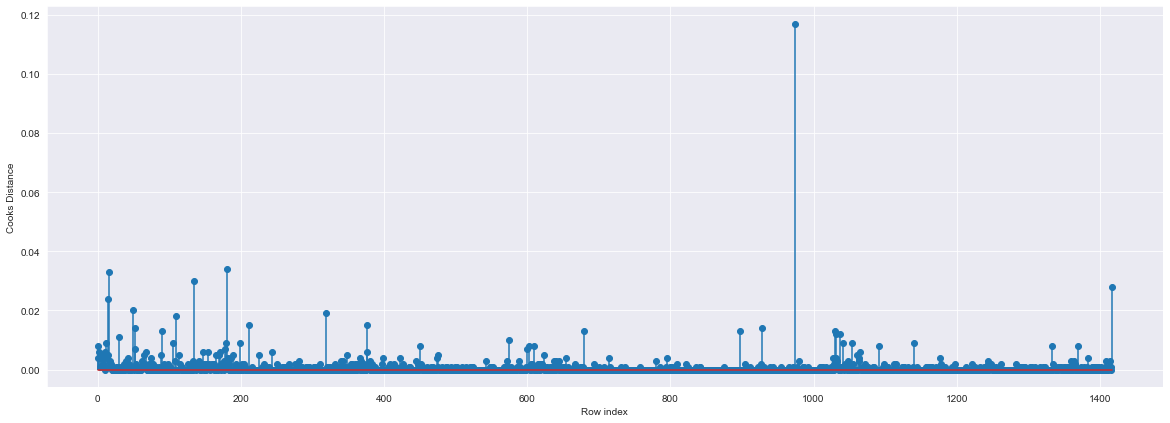

In [40]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota5)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
#index and value of outliers
(np.argmax(c),np.max(c))

(974, 0.11665661388516935)

### Note:it is evident from the above stem plot that data point at index 974 is an outlier.So for better result we will remove the outlier



In [42]:
toyota6= toyota5.drop(toyota4.index[[974]],axis=0).reset_index()
toyota6= toyota6.drop(['index'],axis=1)


### Model4: Another  model using new data toyota6, by removing the outlier at index 974

In [43]:
model4 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight', data = toyota6).fit()

In [44]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1455.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:21:28   Log-Likelihood:                -11964.
No. Observations:                1417   AIC:                         2.395e+04
Df Residuals:                    1408   BIC:                         2.399e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.569e+04   1440.268    -10.892      0.000   -1.85e+04   -1.29e+04
Age         -110.3879      2.349    -47.001      0.000    -114.995    -105.781
KM            -0.0169      0.001    -15.269      0.000      -0.019      -0.015
HP            30.4886      2.616     11.653      0.000      25.356      35.621
cc            -3.2922      0.293    -11.246      0.000      -3.866      -2.718
Doors       -144.2598     35.189     -4.100      0.000    -213.288     -75.231
Gears        364.8142    174.098      2.095      0.036      23.295     706.333
QTax           1.3355      1.343      0.995      0.320      -1.298       3.969
Weight        32.1468      1.365     23.559      0.000      29.470      34.824
==============================================================================
Omnibus:                        9.350   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.478
Skew:                           0.131   Prob(JB):                      0.00531
Kurtosis:                       3.330   Cond. No.                     3.76e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model prediction


In [45]:
pred4 = model4.predict(toyota6.iloc[:,1:])

In [46]:
pred4

0       16261.072271
1       15821.622564
2       16240.010268
3       15912.737575
4       15792.791203
            ...     
1412     9124.687591
1413     8498.201593
1414     8642.186235
1415     8754.267550
1416    10949.691989
Length: 1417, dtype: float64

In [47]:
actual = toyota6.Price

In [48]:
from ml_metrics import rmse
r4=rmse(pred4,actual)
r4

1123.2127870799336

### Setting  all the obsevations into a dictionary for easy look

In [49]:
data=pd.DataFrame({"Model":pd.Series(['Model1','Model2','Model3','Model4']),
                   "rsquared":(model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared),
                   "AIC":(model1.aic,model2.aic,model3.aic,model4.aic),
                   "rmse":(r1,r2,r3,r4)
                  })

In [50]:
data

,Model,rsquared,AIC,rmse
0,Model1,0.862520,24750.407207,1337.590251
1,Model2,0.882568,24102.976267,1173.403047
2,Model3,0.891341,23971.045862,1126.790285
3,Model4,0.892058,23945.141619,1123.212787


## Inference:
### Comparing all models , It is convenient that the  model 4 with  higher R-squared value, lower AIC value of 2.395e+04 and the lowest rmse value of 1123.21.Hence, to predict the Price of the car model 4 is better